In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Cats vs Dogs with Augmentation

In this exercise we will demonstrate how classify images into pictures of cats or dogs. We will use the tf.keras.Sequential model and load data using tf.keras.preprocessing.image.ImageDataGenerator.

### Specific concepts that will be convered:
Skills that will be demonstrated and questions that will be asked:
* Building data input pipelines using the tf.keras.preprocessing.image.ImageDataGenerator class - How can we efficiently work with data on disk to interface with our model?
* Overfitting - what is it, how to identify it, and how can we prevent it?
* Data Augmentation and Dropout - Key techniques to fight overfitting in computer vision tasks that we will incorporate into our data pipeline and image classifier model.

### General Machine Learning Workflow:
* 1. Examine and understand data
* 2. Build an input pipeline
* 3. Build our mode
* 4. Train our model
* 5. Test our model
* 6. Improve our model/Repeat the process

In [1]:
# Import Packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# Data Loading
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)


68616192/68606236 [==============================] - 3s 0us/step


In [ ]:
cats_and_dogs_filtered
|__ train
    |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ validation
    |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]

### Assigning Variables
Now we are assigning variables with the proper file path for the training and validation sets.

In [3]:
base_dir = os.path.join( os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')



In [4]:
train_cats_dir = os.path.join(train_dir, 'cats') #directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') #directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') #directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') #directory with our validation dog pictures



### Understanding our Data
Below are the assigned variables of how many cats and dogs images we have in our training and validation directory.

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train= num_cats_tr + num_dogs_tr
total_validation = num_cats_val + num_dogs_val

print('Total Training Cat Images:', num_cats_tr)
print('Total Training Dog Images:', num_dogs_tr)
print('\n')
print('Total Validation Cat Images:', num_cats_val)
print('Total Validation Dog Images:', num_dogs_val)
print('\n')
print('Total Training Images:', total_train)
print('Total Validation Images:', total_validation)


Total Training Cat Images: 1000
Total Training Dog Images: 1000


Total Validation Cat Images: 500
Total Validation Dog Images: 500


Total Training Images: 2000
Total Validation Images: 1000


### Setting Model Parameters:
We will set up variables that will be used later while pre-processing our dataset and training our network.

In [6]:
BATCH_SIZE = 100
IMG_SHAPE = 150 #Our training data consists of images with width of 150 pixels and a height of 150 pixels


After defining our generator for training and validation images from the disk and will apply rescaling and will resize them into required dimensions using single line of code.

### Data Augmentation
 
 Overfitting often occurs when we have a small number of training examples.  One way to fix this problem is to augment our dataset so that it has sufficient number and variety of training examples.  Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples through random transformations that yield believable looking images.  The goal is that at training time, our model will never see the exact same picture twice.  The exposoes the model to more aspects of the daata allowing it to generalize better.

 In tf.keras we can implement this using the same ImageDataGenerator class we use before.  We can simply pass different transformations we would want our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

 We will plot an image to see what type of augmentation has been performed.  We are specifically looking at the augmentations used for training.

In [7]:
# The function will plot images in the form of a grid with 1 row and 5 columns
# Where images are placed in each column.
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()




### Flipping the Image Horizontally
We can begin by randomly applying horizontal flip augmentation to our dataset and seeing how individual images will look after the transformation.  This is achieved by passing `horizontal_flip = True` as an argument to the `ImageDataGenerator` class.



In [8]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size =(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


To see the transformation in action, we will take one sample image from our training set and repeat it five times.  The augmentation will be randomly applied (or not) to each repetition.

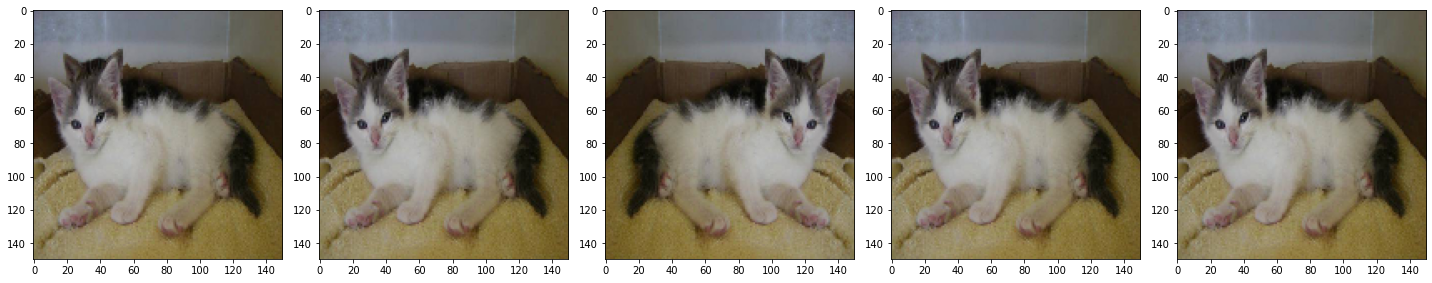

In [9]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Rotating the image
The rotation augmentation will randomly rotate the imgae up to a specified number of degrees.  Here, we'll set it to 45.

In [10]:
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


To see the transformation in action, let's once again take a sample image from our training set and repeat it.  The augmentation will be randomly applied (or not) to each repetition.



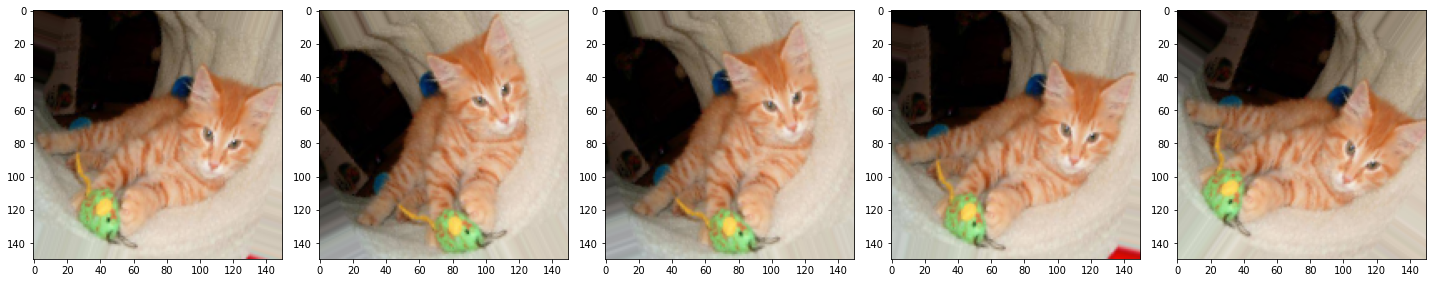

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)



### Applying Zoom
Next we are going to apply Zoom augmentation to our dataset, zooming images up to 50% randomly.

In [12]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory = train_dir,
                                                shuffle = True,
                                                target_size = (IMG_SHAPE, IMG_SHAPE))



Found 2000 images belonging to 2 classes.


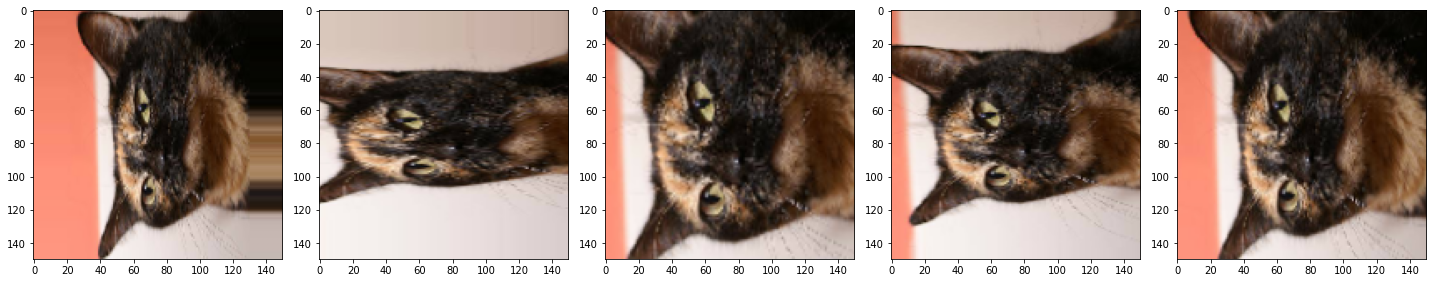

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Putting it together

Now we are going to apply these augmentation and others in the following code below.  
Recall that we are going to apply rescale, rotation of 45 degrees, horizontal flip, and zoom to our training images.

In [14]:
image_gen_train = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                     directory = train_dir,
                                                     shuffle = True,
                                                     class_mode = 'binary',
                                                     target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


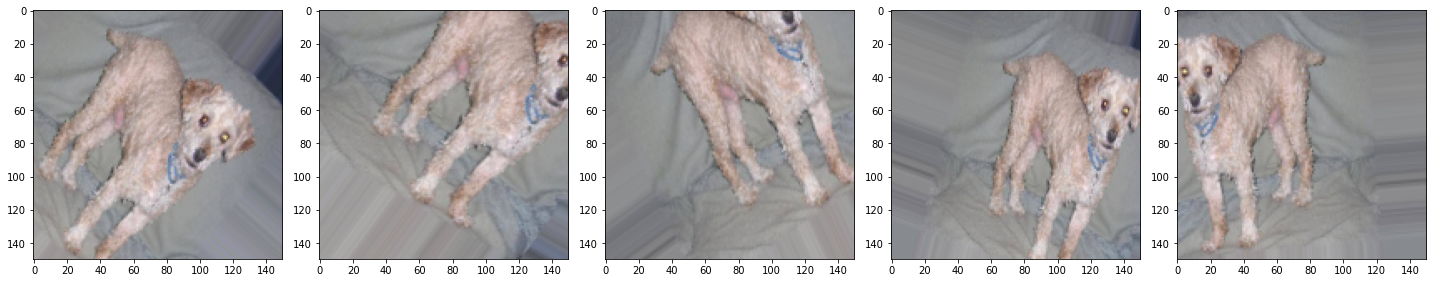

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Creating Validation Data Generator

Generally, we only apply data augmentation to our training examples, since the original images should be representative of what our model needs to manage.  So, in this case we are only rescaling our validation images and converting them into batches using ImageDataGenerator.

In [16]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE,
                                                 directory = validation_dir,
                                                 target_size = (IMG_SHAPE,IMG_SHAPE),
                                                 class_mode = 'binary'
                                                 )

Found 1000 images belonging to 2 classes.


### Model Creation

The model consist of four convolution blocks of a max pooling layer in each of them.

Before the final Dense layer, we're also applhying a Dropout probability of 0.5.  It means that 50% of the values coming into the DropOut layer will be set to zero.  This helps to prevent overfitting.

Then we have a fully connected layer with 512 units `relu` activation function.  The model will output probabilities for two class -dogs and cats using `softmax`.


In [17]:
modle = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation = 'relu'),
      tf.keras.layers.Dense(2)
])



### Compile the Model:
We will use the `adam` optimizer.  Since we output a `softmax` categorization, we'll use `SparseCategoricalCrosentropy` as the loss function.  We would also like to look at training and validation accuracy on each epoch as we train our network, so we ar passing in the metrics argument.

In [18]:
modle.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [19]:
modle.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Train our model
Time to train our network
Since our batches are coming from a generator(`ImageDataGenerator`), use `fit_generator` instead of `fit`.

In [20]:
epochs = 100

history = modle.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/ float(BATCH_SIZE))),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_validation/ float(BATCH_SIZE)))
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
20/20 [==============================] - 113s 6s/step - loss: 0.7627 - accuracy: 0.5145 - val_loss: 0.6895 - val_accuracy: 0.5120
Epoch 2/100
20/20 [==============================] - 110s 5s/step - loss: 0.6874 - accuracy: 0.5565 - val_loss: 0.6762 - val_accuracy: 0.5360
Epoch 3/100
20/20 [==============================] - 110s 5s/step - loss: 0.6782 - accuracy: 0.5700 - val_loss: 0.6858 - val_accuracy: 0.5220
Epoch 4/100
20/20 [==============================] - 110s 5s/step - loss: 0.6740 - accuracy: 0.5815 - val_loss: 0.6766 - val_accuracy: 0.5210
Epoch 5/100
20/20 [==============================] - 109s 5s/step - loss: 0.6618 - accuracy: 0.5990 - val_loss: 0.6698 - val_accuracy: 0.5720
Epoch 6/100
20/20 [==============================] - 110s 5s/step - loss: 0.6579 - accuracy: 0.6055 - val_loss: 0.6525 - val_accuracy: 0.6180
Epoch 7/100
20/20 [==============================] - 110s 5s/step - loss: 0.6741 - accuracy: 0.5660 - val_loss: 0.6393 - val_accuracy: 0.6260
Epoch 

### Visualing Results of the Training
We'll not visualize the results we get after training our network.

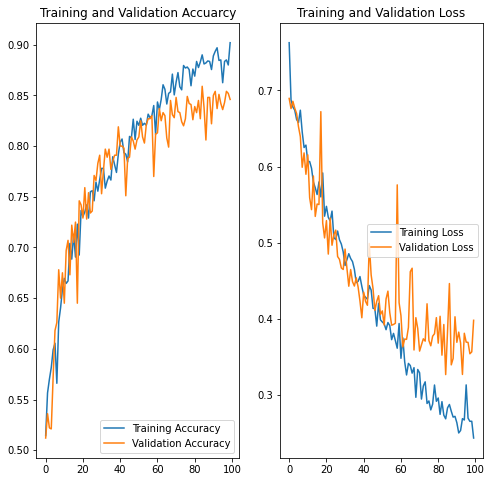

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuarcy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'center right')
plt.title('Training and Validation Loss')
plt.show()



### Conclusion:
The graph shows the model is training accrracy and validation accurcy are corresponding with one from ranges epochs = 1 to approximately epochs = 60.  When epochs is 60, the validation accuracy begins to separete from the training accuracy.  Now when we compare the loss graph to the accuracy graph we get a similar case but the validation loss overfits the training loss at approximately 60 epochs.  Thus, in order to prevent the model from memorization, we only need to train our model after 60 epochs.  

Techniques to prevent overfitting our was image augmentation and dropout.  Image augmentation artifically boosting the number of images in our training set by applying random image transfromations to the existing images in the training set.  Plus, the droput function allowed the model to remove a random selection of a fixed number of nurons in a neural network during training.  